In [1]:
import numpy as np
import sys
import transformers
import pandas as pd
import importlib

sys.path.append("../")
from src.data import datasets
importlib.reload(datasets)

c:\Users\tatur\anaconda3\envs\maslab_base\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'src.data.datasets' from 'd:\\etu\\nn\\paraphrase_detection_etu\\notebooks\\..\\src\\data\\datasets.py'>

In [3]:
df = pd.read_csv("../data/interim/quora.csv")
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
print(df.shape)
df = df.dropna().reset_index(drop=True)
print(df.shape)

(404290, 6)
(404287, 6)


<Axes: xlabel='is_duplicate', ylabel='count'>

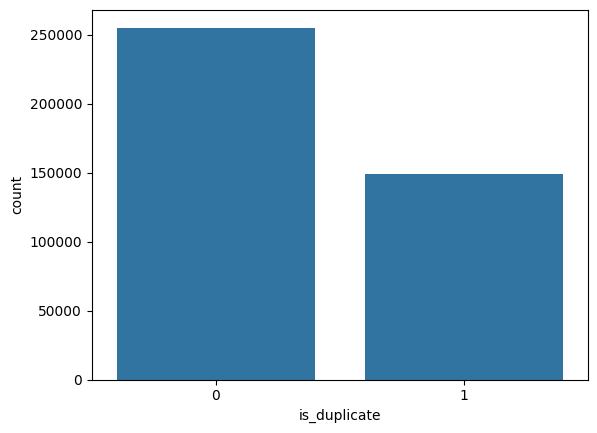

In [6]:
import seaborn as sns
sns.countplot(df, x="is_duplicate")

In [4]:
print(f"Possible labels: {df.is_duplicate.unique()}")
print(f"Label counts:\n {df.is_duplicate.value_counts()}")

Possible labels: [0 1]
Label counts:
 0    255024
1    149263
Name: is_duplicate, dtype: int64


In [18]:
# Using debertav3 as autotokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("microsoft/deberta-v3-large", use_fast=True)
# Example output
tokenizer_out = tokenizer(df.loc[2, "question1"], df.loc[2, "question2"])
print(f"Original sentences:\nQ1:{df.loc[2, 'question1']}\nQ2:{df.loc[2, 'question2']}")
print(f"Tokenizer out:\n{tokenizer_out['input_ids']}")
print(f"Tokenizer out decoded:\n{''.join(tokenizer.decode(tokenizer_out['input_ids']))}")

Original sentences:
Q1:How can I increase the speed of my internet connection while using a VPN?
Q2:How can Internet speed be increased by hacking through DNS?
Tokenizer out:
[1, 577, 295, 273, 993, 262, 1584, 265, 312, 1565, 1853, 438, 478, 266, 7922, 302, 2, 577, 295, 1763, 1584, 282, 1592, 293, 14313, 390, 14361, 302, 2]
Tokenizer out decoded:
[CLS] How can I increase the speed of my internet connection while using a VPN?[SEP] How can Internet speed be increased by hacking through DNS?[SEP]


c:\Users\tatur\anaconda3\envs\maslab_base\lib\site-packages\transformers\convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [6]:
print(f"Vocabulary size {tokenizer.vocab_size}")

Vocabulary size 128000


In [7]:
train, validate, test = np.split(
    df.sample(frac=1, random_state=42), 
    [int(.7*len(df)), int(.85*len(df))]
    )
print(f"Train samples: {train.shape[0]}, val samples: {validate.shape[0]}, test samples: {test.shape[0]} ")

Train samples: 283000, val samples: 60643, test samples: 60644 


In [8]:
train.to_csv("../data/processed/train.csv", index=False)
validate.to_csv("../data/processed/val.csv", index=False)
test.to_csv("../data/processed/test.csv", index=False)